In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
from collections import Counter

In [2]:
data = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/весь_период.xlsx")
data.head(5)

,#,Дата,Номер звонящего,С кем соединен,Время ожидания,Время разговора,Статус,utm_source,utm_medium,utm_campaign,utm_term,Статус2
0,626,01-09-2019 13:08:53,3129545,Call_3,00:43,00:00,Нет ответа,(direct),(none),(direct),(none),Входящий
1,625,01-09-2019 13:09:36,3129545,Call_3,00:01,00:00,Нет ответа,(direct),(none),(direct),(none),Входящий
2,624,01-09-2019 15:42:06,4051838,Call_1,00:20,00:37,Целевой,(direct),(none),(direct),(none),Входящий
3,442,01-10-2019 11:03:52,7851311,Call_3,00:37,00:00,Нет ответа,www.google.com,organic,(organic),(not provided),Входящий
4,441,01-10-2019 11:24:58,6300086,Call_3,00:41,00:00,Нет ответа,www.google.com.ua,organic,(organic),(not provided),Входящий


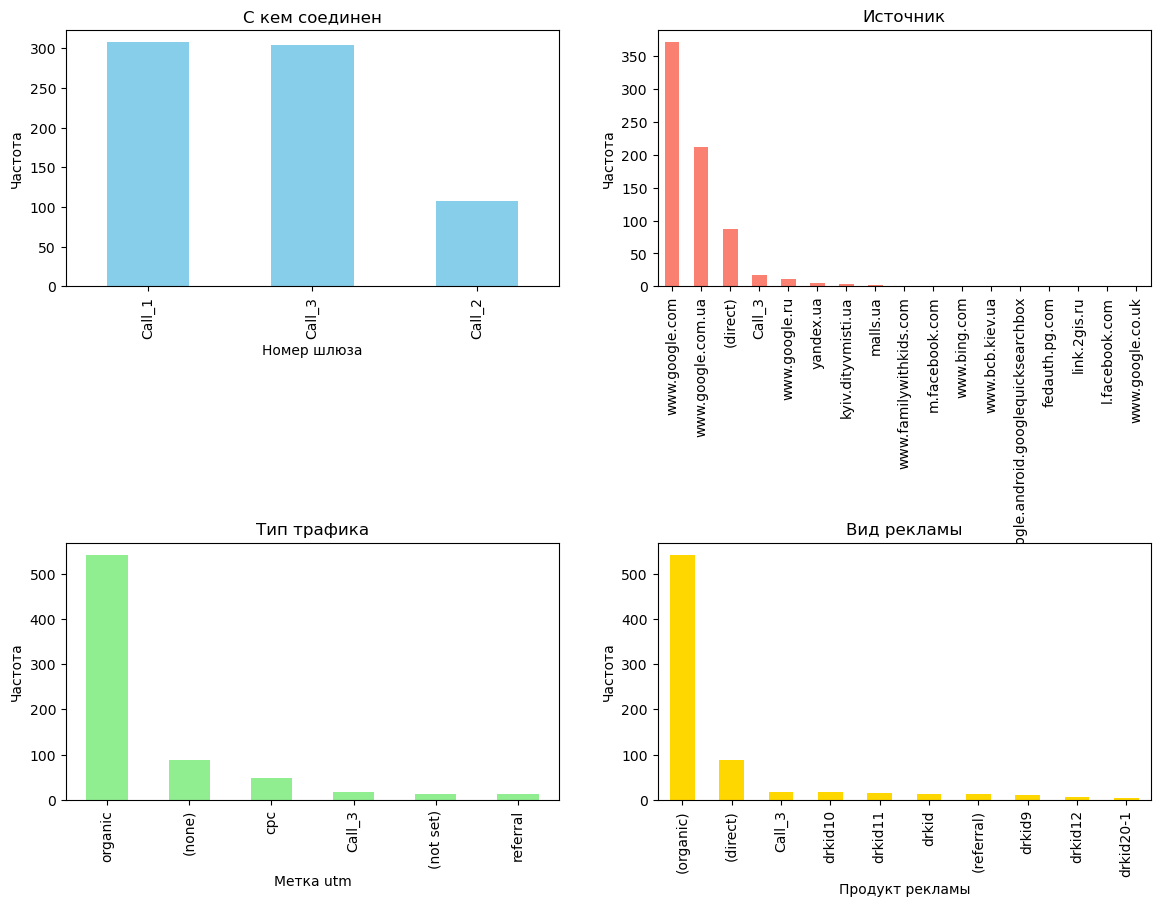

In [3]:
df = pd.DataFrame(data)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
plt.subplots_adjust(hspace=1)

df['С кем соединен'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('С кем соединен')
axes[0, 0].set_xlabel('Номер шлюза')
axes[0, 0].set_ylabel('Частота')

df['utm_source'].value_counts().plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Источник')
axes[0, 1].set_xlabel('маркетинговые каналы')
axes[0, 1].set_ylabel('Частота')

df['utm_medium'].value_counts().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Тип трафика')
axes[1, 0].set_xlabel('Метка utm')
axes[1, 0].set_ylabel('Частота')

df['utm_campaign'].value_counts().plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Вид рекламы')
axes[1, 1].set_xlabel('Продукт рекламы')
axes[1, 1].set_ylabel('Частота')

plt.show()


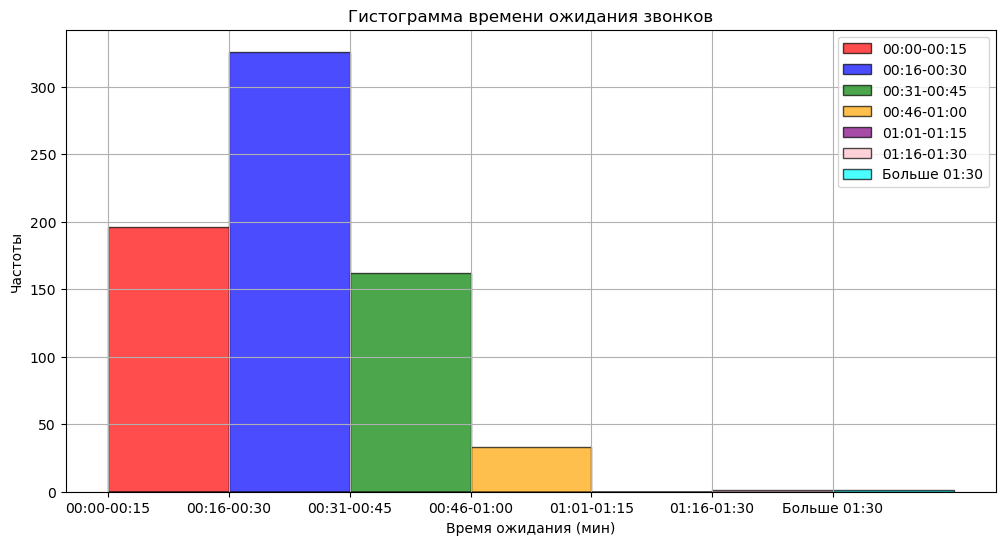

In [4]:

# Преобразование времени ожидания в минуты
wait_times_minutes = []
for time_str in df['Время ожидания']:
    time_parts = time_str.split(':')
    minutes = int(time_parts[0]) * 60 + int(time_parts[1])
    wait_times_minutes.append(minutes)

# Интервалы для гистограммы
bins = [0, 15, 30, 45, 60, 75, 90, np.inf]
labels = ['00:00-00:15', '00:16-00:30', '00:31-00:45', '00:46-01:00', '01:01-01:15', '01:16-01:30', 'Больше 01:30']
bin_edges = [0, 15, 30, 45, 60, 75, 90, 105]

# Цикл  для каждого интервала
hist_data = [[] for _ in range(len(labels))]
for time in wait_times_minutes:
    for i, edge in enumerate(bin_edges[:-1]):
        if edge <= time < bin_edges[i+1]:
            hist_data[i].append(time)
            break

# Цвета для каждого интервала
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan']

# Построение гистограммы для каждого интервала
plt.figure(figsize=(12, 6))
for i, data in enumerate(hist_data):
    plt.hist(data, bins=bin_edges, color=colors[i], edgecolor='black', alpha=0.7, label=labels[i])

plt.xlabel('Время ожидания (мин)')
plt.ylabel('Частоты')
plt.title('Гистограмма времени ожидания звонков')
plt.xticks(bin_edges[:-1], labels)
plt.legend()
plt.grid(True)
plt.show()


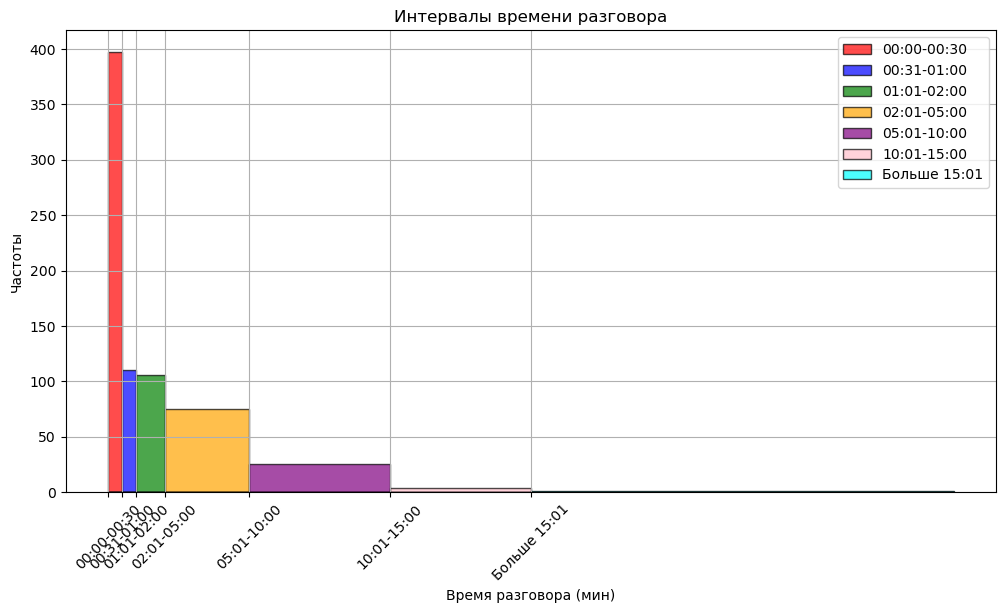

In [5]:
# Преобразование времени разговора в минуты
conversation_times_minutes = []
for time_str in df['Время разговора']:
    time_parts = time_str.split(':')
    minutes = int(time_parts[0]) * 60 + int(time_parts[1])
    conversation_times_minutes.append(minutes)

# Создание интервалов для гистограммы
bins = [0, 30, 60, 120, 300, 600, 900, np.inf]
labels = ['00:00-00:30', '00:31-01:00', '01:01-02:00', '02:01-05:00', '05:01-10:00', '10:01-15:00', 'Больше 15:01']
bin_edges = [0, 30, 60, 120, 300, 600, 900, 1801]

# Цикл для каждого интервала
hist_data = [[] for _ in range(len(labels))]
for time in conversation_times_minutes:
    for i, edge in enumerate(bin_edges[:-1]):
        if edge <= time < bin_edges[i+1]:
            hist_data[i].append(time)
            break

# Цвета для каждого интервала
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan']

# Построение гистограммы для каждого интервала
plt.figure(figsize=(12, 6))
for i, data in enumerate(hist_data):
    plt.hist(data, bins=bin_edges, color=colors[i], edgecolor='black', alpha=0.7, label=labels[i])

plt.xlabel('Время разговора (мин)')
plt.ylabel('Частоты')
plt.title('Интервалы времени разговора')
plt.xticks(bin_edges[:-1], labels, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


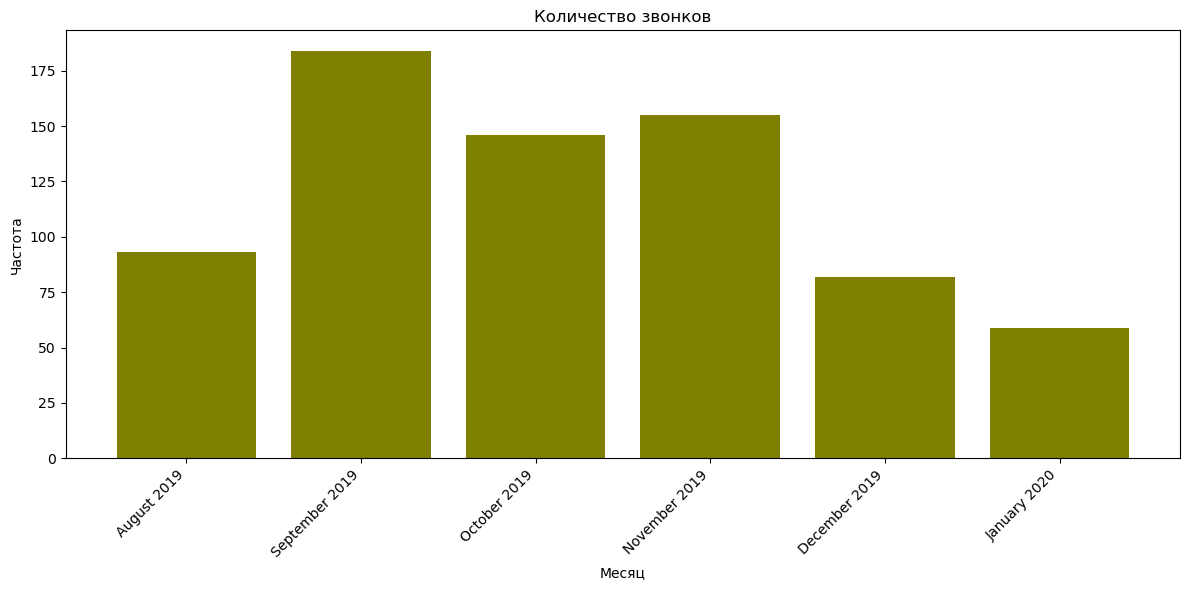

In [6]:
# Преобразование дат 
date_objects = [datetime.strptime(date_str, '%d-%m-%Y %H:%M:%S') for date_str in df['Дата']]

months = [date.strftime('%B %Y') for date in date_objects]

month_counts = Counter(months)

# Сортировка месяцев 
sorted_months = sorted(month_counts.items(), key=lambda x: datetime.strptime(x[0], '%B %Y'))

# Разделение 
months_sorted, frequencies_sorted = zip(*sorted_months)

plt.figure(figsize=(12, 6))
plt.bar(months_sorted, frequencies_sorted, color='olive')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.title('Количество звонков')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


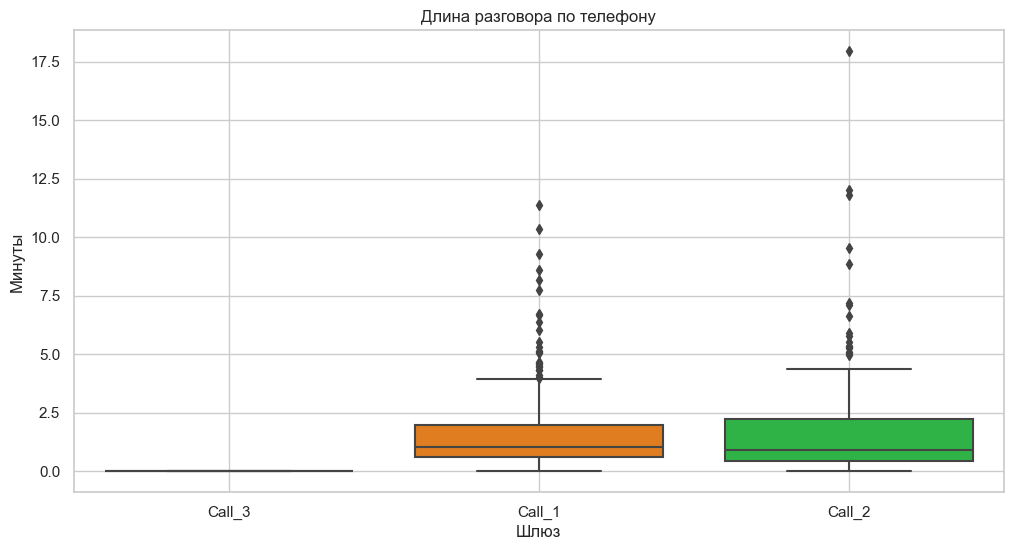

In [7]:
conversation_times_minutes = []
for time_str in df['Время разговора']:
    time_parts = time_str.split(':')
    minutes = int(time_parts[0]) * 1 + int(time_parts[1])/60
    conversation_times_minutes.append(minutes)
    
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(
    x=df['С кем соединен'], 
    y=conversation_times_minutes, 
    data=df,
    width=.8,
    palette='bright');
ax.xaxis.grid(True)
ax.set(xlabel="Шлюз")
ax.set(ylabel="Минуты")
ax.set(title="Длина разговора по телефону")
fig.savefig('boxplot_int.png')

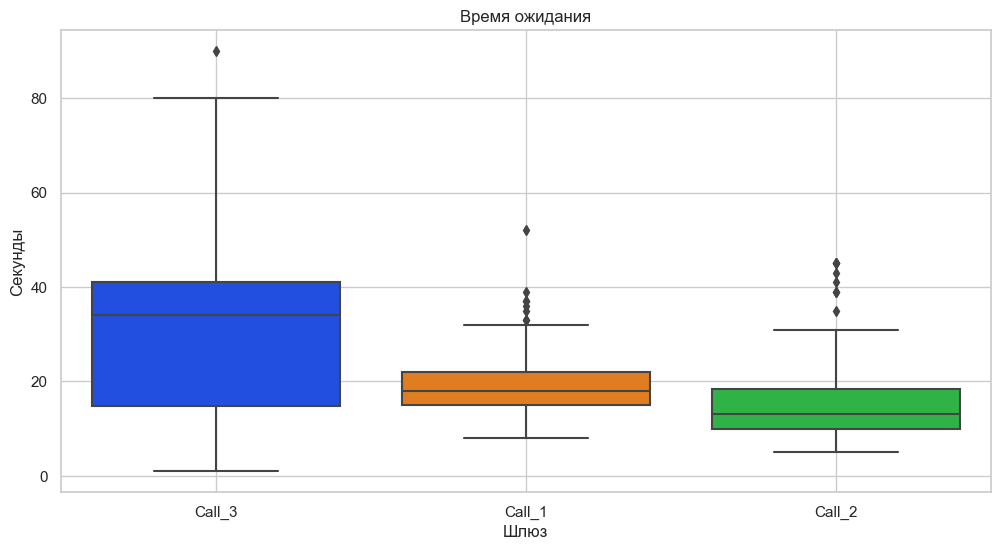

In [8]:

wait_times_minutes = []
for time_str in df['Время ожидания']:
    time_parts = time_str.split(':')
    minutes = int(time_parts[0]) * 60 + int(time_parts[1])
    wait_times_minutes.append(minutes)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(
    x=df['С кем соединен'], 
    y=wait_times_minutes, 
    data=df,
    width=.8,
    palette='bright');
ax.xaxis.grid(True)
ax.set(xlabel="Шлюз")
ax.set(ylabel="Секунды")
ax.set(title="Время ожидания")
fig.savefig('boxplot_int.png')

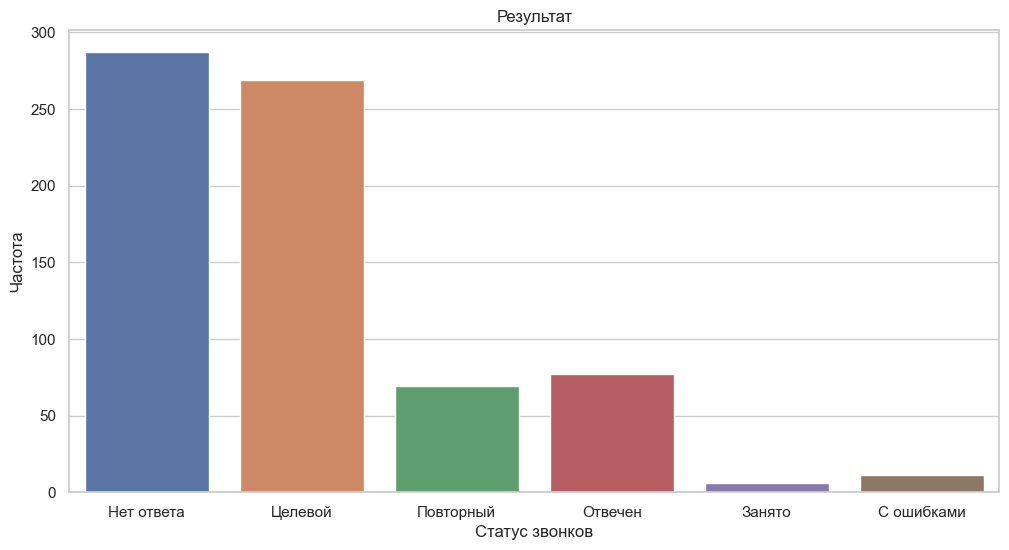

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df["Статус"] )

plt.title("Результат")
plt.xlabel("Статус звонков")
plt.ylabel("Частота")
fig.savefig('histogramm_int_rate.png',bbox_inches='tight')

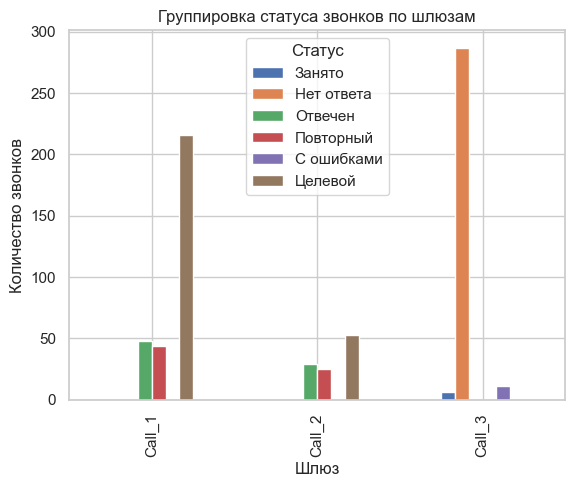

In [10]:
data = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/весь_период.xlsx")
df = pd.DataFrame(data)

# Группировка данных по столбцам 'С кем соединен' и 'Статус'
grouped_data = df.groupby(['С кем соединен', 'Статус']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=False, width=0.5)

plt.xlabel('Шлюз')
plt.ylabel('Количество звонков')
plt.title('Группировка статуса звонков по шлюзам')

plt.show()


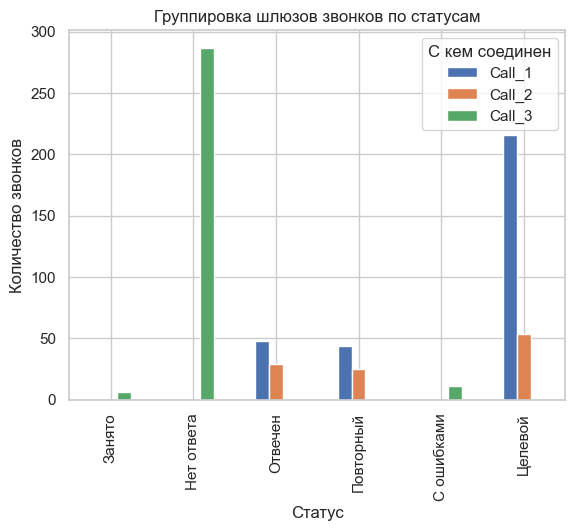

In [11]:
data = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/весь_период.xlsx")
df = pd.DataFrame(data)

# Группировка данных по столбцам 'С кем соединен' и 'Статус'
grouped_data = df.groupby(['Статус', 'С кем соединен']).size().unstack(fill_value=0)

# Построение гистограммы
grouped_data.plot(kind='bar', stacked=False, width=0.5)

plt.xlabel('Статус')
plt.ylabel('Количество звонков')
plt.title('Группировка шлюзов звонков по статусам')

plt.show()



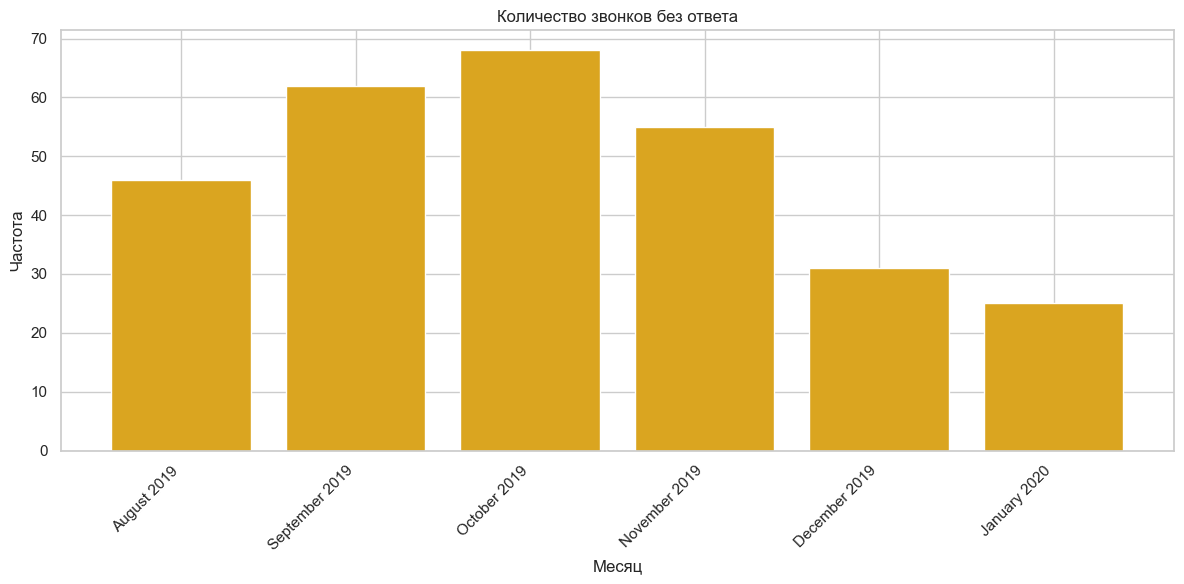

In [12]:
data = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/весь_период.xlsx")
df = pd.DataFrame(data)

# Филтр данных по столбцам Статусу: нет ответа
grouped_data = df[df['Статус'].isin(['Нет ответа'])]

# Преобразование строк дат 
date_objects = [datetime.strptime(date_str, '%d-%m-%Y %H:%M:%S') for date_str in grouped_data['Дата']]

# Создание списка месяцев
months = [date.strftime('%B %Y') for date in date_objects]

# Подсчет количества звонков в каждом месяце
month_counts = Counter(months)

# Сортировка месяцев 
sorted_months = sorted(month_counts.items(), key=lambda x: datetime.strptime(x[0], '%B %Y'))

# Разделение 
months_sorted, frequencies_sorted = zip(*sorted_months)

plt.figure(figsize=(12, 6))
plt.bar(months_sorted, frequencies_sorted, color='goldenrod')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.title('Количество звонков без ответа')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

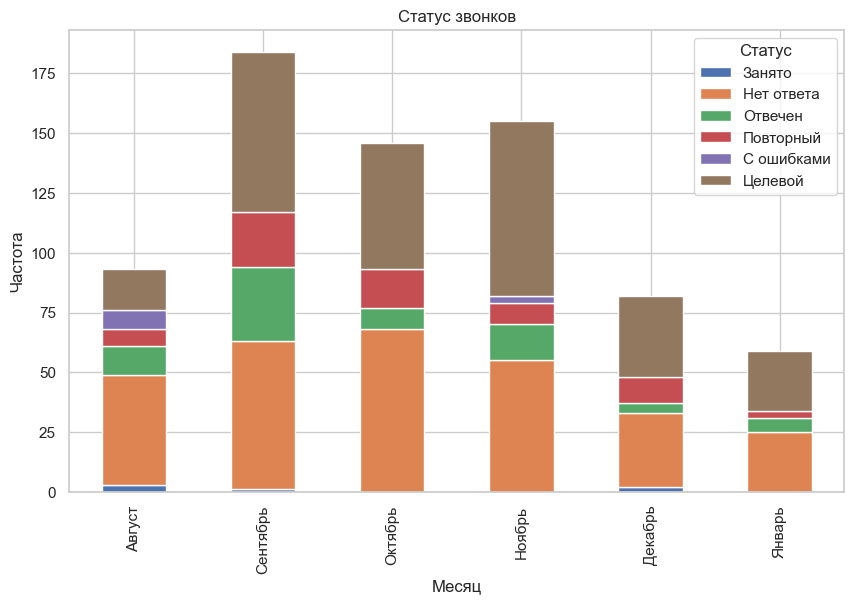

In [13]:
data = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/весь_период.xlsx")
# Преобразование столбца 'Дата' в формат даты
data['Дата'] = pd.to_datetime(data['Дата'], format='%d-%m-%Y %H:%M:%S')

# Добавление столбца 'Месяц'
data['Месяц'] = data['Дата'].dt.month

# Создание словаря для  месяцев
month_names = {
    8: 'Август', 
    9: 'Сентябрь', 
    10: 'Октябрь', 
    11: 'Ноябрь', 
    12: 'Декабрь',
    1: 'Январь'
}

# Замена номеров месяцев на их названия 
data['Месяц'] = data['Месяц'].map(month_names)

# Группировка данных 
grouped_data = data.groupby(['Месяц', 'Статус']).size().unstack(fill_value=0)

# Определение порядка месяцев для сортировки
months_order = list(month_names.values())


grouped_data.loc[months_order].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(title='Статус')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.title('Статус звонков')

plt.show()

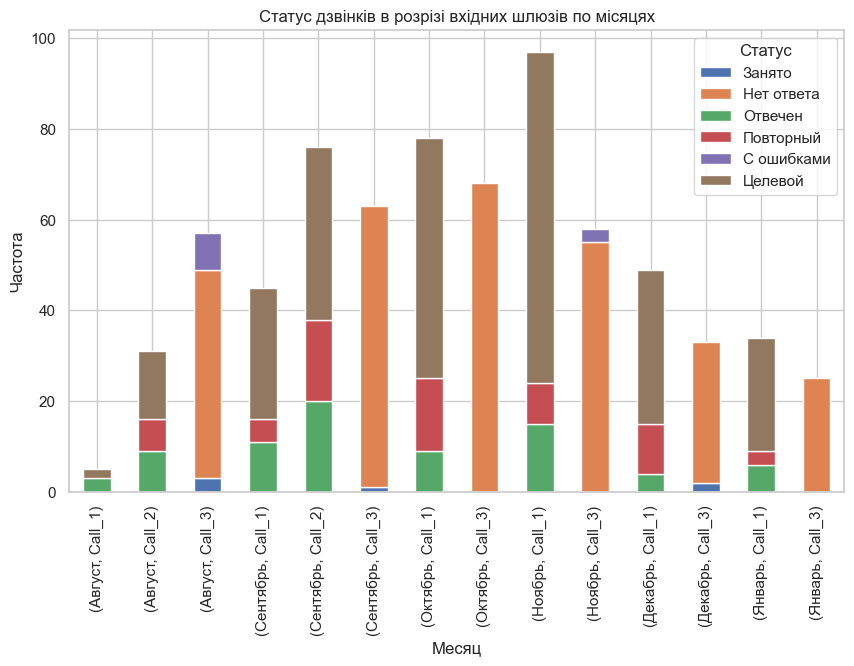

In [14]:
data = pd.read_excel("C:/Users/User/Desktop/MATHEMATICS/Пробный/весь_период.xlsx")
# Преобразование столбца 'Дата' 
data['Дата'] = pd.to_datetime(data['Дата'], format='%d-%m-%Y %H:%M:%S')

# Добавление столбца 'Месяц'
data['Месяц'] = data['Дата'].dt.month

# Создание словаря 
month_names = {
    8: 'Август', 
    9: 'Сентябрь', 
    10: 'Октябрь', 
    11: 'Ноябрь', 
    12: 'Декабрь',
    1: 'Январь'
}

data['Месяц'] = data['Месяц'].map(month_names)

# Группировка данных 
grouped_data = data.groupby(['Месяц', 'С кем соединен', 'Статус']).size().unstack(fill_value=0)

# Сортировка
months_order = list(month_names.values())


grouped_data.loc[months_order].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(title='Статус')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.title('Статус дзвінків в розрізі вхідних шлюзів по місяцях')
plt.show()
